# ASE使い方のメモ
ASEの機能を試して、勘所を学ぶ。一つ一つの操作は、マニュアル参照<BR>
2024.01.10 中山<BR>

In [1]:
#一般モジュールのインポート

import numpy as np
import math, random

import os,sys,csv,glob,shutil,re,time
from time import perf_counter
from joblib import Parallel, delayed
args = sys.argv

import matplotlib.pyplot as plt

#ASEモジュールのインポート
import ase
from ase.constraints import FixAtoms, FixedPlane, FixBondLength, UnitCellFilter
from ase.optimize import LBFGS
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution, Stationary
from ase.md.verlet import VelocityVerlet
from ase.md.langevin import Langevin
from ase.md import MDLogger
from ase import Atoms
from ase.io import read, write
from ase.io import Trajectory
from ase import units
from ase.visualize import view

## Atoms object
結晶構造ファイルの読み込みは、 atoms.io.read でやる。<BR>
対応フォーマットは、　https://wiki.fysik.dtu.dk/ase/ase/io/io.html　　を参照<BR>


In [2]:
# POSCARファイルの読み込み(ASE Atoms形式)  example NaCl

inpf="./inputs/ICSD29929.cif"
atoms=read(inpf,format="cif")

print(atoms)

#back up用に以下作っとくと良いかな
atoms_save=atoms.copy()  #元のatomsデータを保存  atoms_save=atoms  では、どちらか一方の結果が代わると、もう一方も変化してしまう

Atoms(symbols='Na4Cl4', pbc=True, cell=[5.6338, 5.6338, 5.6338], spacegroup_kinds=...)


#### atoms objectからの各種情報の取り出し
  参考サイト   https://wiki.fysik.dtu.dk/ase/ase/atoms.html

In [3]:

print(atoms.get_chemical_symbols())  # 元素の抽出（インデックス番号順）
print(atoms.positions)               # 原子の位置情報（ Cartesian 座標形式 )
print(type(atoms.positions))
print()
print(atoms.get_scaled_positions())  # 原子の位置情報（ Fractional(分率) 座標形式 )
print(type(atoms.get_scaled_positions()))

['Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl']
[[0.     0.     0.    ]
 [0.     2.8169 2.8169]
 [2.8169 0.     2.8169]
 [2.8169 2.8169 0.    ]
 [2.8169 2.8169 2.8169]
 [2.8169 0.     0.    ]
 [0.     2.8169 0.    ]
 [0.     0.     2.8169]]
<class 'numpy.ndarray'>

[[0.  0.  0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]
 [0.5 0.5 0.5]
 [0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
<class 'numpy.ndarray'>


### 値の書き換えできるパラメーターと、参照しかできないパラメーターについて

In [4]:
print ("以下のパラメーターは、代入することで修正可能")
print ("atoms.cell------------------------------")
print (atoms.cell)
print ("atoms.positions-------------------------　分率座標表記ではない")
print (atoms.positions)
print ("atoms.symbols---------------------------")
print (atoms.symbols[0],atoms.symbols[5],atoms.symbols[:])
print ("----------------------------------------")

print ("")
print ("以下のパラメーター引用は、代入不可（値を書き換えられない）")
print ("atoms.cell.cellpar()",atoms.cell.cellpar())
print ("atoms.get_number_of_atoms() ",atoms.get_number_of_atoms() )
print ("atoms.get_scaled_positions()",atoms.get_scaled_positions())
print ("atoms.get_chemical_formula('hill')",atoms.get_chemical_formula('hill'))
print ("atoms.get_chemical_symbols()",atoms.get_chemical_symbols() )


以下のパラメーターは、代入することで修正可能
atoms.cell------------------------------
Cell([5.6338, 5.6338, 5.6338])
atoms.positions-------------------------　分率座標表記ではない
[[0.     0.     0.    ]
 [0.     2.8169 2.8169]
 [2.8169 0.     2.8169]
 [2.8169 2.8169 0.    ]
 [2.8169 2.8169 2.8169]
 [2.8169 0.     0.    ]
 [0.     2.8169 0.    ]
 [0.     0.     2.8169]]
atoms.symbols---------------------------
Na Cl Na4Cl4
----------------------------------------

以下のパラメーター引用は、代入不可（値を書き換えられない）
atoms.cell.cellpar() [ 5.6338  5.6338  5.6338 90.     90.     90.    ]
atoms.get_number_of_atoms()  8
atoms.get_scaled_positions() [[0.  0.  0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]
 [0.5 0.5 0.5]
 [0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
atoms.get_chemical_formula('hill') Cl4Na4
atoms.get_chemical_symbols() ['Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl']


/var/folders/0f/gst3ndcj1gl6tx25nxpl4vh80000gn/T/ipykernel_98171/3962286089.py:13: FutureWarning: Please use len(self) or, if your atoms are distributed, self.get_global_number_of_atoms.
  print ("atoms.get_number_of_atoms() ",atoms.get_number_of_atoms() )


### リスト形式データの引用
引用した結果に、複数の数値が含まれている場合は、 [数字]で、特定のデータを引用できる

In [5]:
print("------------------------------------------------------1")
print(atoms.positions)
print("------------------------------------------------------2")
print(atoms.positions[1])
print("------------------------------------------------------3")
print(atoms.positions[1][2])
print(atoms.positions[1,2])
print("------------------------------------------------------4")
print(atoms.positions[1][1:3])  #[1:3]は2列目から3列目を取得
print(atoms.positions[1,1:3])  #[1:3]は2列目から3列目を取得
print("------------------------------------------------------5")
print(atoms.positions[:][2])  #[:] は全データに対応
print(atoms.positions[:,2])  #[:] は全データに対応

------------------------------------------------------1
[[0.     0.     0.    ]
 [0.     2.8169 2.8169]
 [2.8169 0.     2.8169]
 [2.8169 2.8169 0.    ]
 [2.8169 2.8169 2.8169]
 [2.8169 0.     0.    ]
 [0.     2.8169 0.    ]
 [0.     0.     2.8169]]
------------------------------------------------------2
[0.     2.8169 2.8169]
------------------------------------------------------3
2.8169
2.8169
------------------------------------------------------4
[2.8169 2.8169]
[2.8169 2.8169]
------------------------------------------------------5
[2.8169 0.     2.8169]
[0.     2.8169 2.8169 0.     2.8169 0.     0.     2.8169]


In [6]:
#結合長解析     
distall=atoms.get_all_distances()      #全結合ペアーの結合長テーブル (原子数×原子数)
print("shape",distall.shape)
print(distall)
print("distance between index 0 and 1: {:1.6f} ang.".format(distall[0][1]))

shape (8, 8)
[[0.         3.98369818 3.98369818 3.98369818 4.87901392 2.8169
  2.8169     2.8169    ]
 [3.98369818 0.         3.98369818 3.98369818 2.8169     4.87901392
  2.8169     2.8169    ]
 [3.98369818 3.98369818 0.         3.98369818 2.8169     2.8169
  4.87901392 2.8169    ]
 [3.98369818 3.98369818 3.98369818 0.         2.8169     2.8169
  2.8169     4.87901392]
 [4.87901392 2.8169     2.8169     2.8169     0.         3.98369818
  3.98369818 3.98369818]
 [2.8169     4.87901392 2.8169     2.8169     3.98369818 0.
  3.98369818 3.98369818]
 [2.8169     2.8169     4.87901392 2.8169     3.98369818 3.98369818
  0.         3.98369818]
 [2.8169     2.8169     2.8169     4.87901392 3.98369818 3.98369818
  3.98369818 0.        ]]
distance between index 0 and 1: 3.983698 ang.


In [7]:
# Naイオンだけの情報を抽出したい (Naでかつ z分率座標が 0.4以上)
for i in range(len(atoms)):  # lenは対象となるリストやオブジェクトの数を抽出する関数（atomsの場合は原子数-1となる)
    if atoms.get_chemical_symbols()[i] == "Na" and atoms.get_scaled_positions()[i][2] >= 0.4:
        print ("Na", atoms.get_scaled_positions()[i])


Na [0.  0.5 0.5]
Na [0.5 0.  0.5]


## Trajectory データの取り扱い  (分子動力学法等で得られる軌跡ファイル)

In [10]:
# 分子動力学法の軌跡データなど（MD 1step 毎のデータ )  Li112P16S96の場合

traj=read("./inputs/MD.traj", index="1000:9000:10")  
            # index=":"は全ステップデータ   "100:" 100step以降   ":100"  100stepまで  
            #       "100:10000:10"  100ステップ目から10000ステップまで、10step毎に読み込み
#traj=read("./inputs/XDATCAR", index=":", format="vasp-xdatcar")  # index=":"は全ステップデータ   "100:" 100step以降   ":100"  100stepまで

print(len(traj))  #trajの長さ＝MDステップ数
print(len(traj[-1]))  #traj[-1] 最後のステップの記録  = 構造中に含まれる現数数
print(traj[0].get_chemical_formula())


800
224
Li112P16S96


In [12]:
# 最終ステップの速度データを取得
final_step = traj[-1]

# 速度データの取得
velocities = final_step.get_velocities()
force = final_step.get_forces()
energy = final_step.get_potential_energy()

# 結果の表示
print(velocities, force, energy)

[[-6.39836955e-03  7.75061909e-03 -5.93117682e-02]
 [-1.63873896e-02  7.11322997e-02  6.48840187e-02]
 [ 2.67553081e-02 -1.60858262e-01 -6.59487855e-02]
 [-6.98525694e-03  1.22160601e-01  5.14599202e-02]
 [-3.24579108e-02  6.75873383e-02 -2.60240189e-03]
 [ 6.19271308e-02  2.76419291e-02 -2.57398630e-02]
 [-1.39810348e-01 -6.61218134e-03 -5.93130444e-02]
 [-1.81550095e-01  9.17573861e-02  1.01063074e-01]
 [ 8.30017777e-02  1.78044374e-01  8.98733305e-02]
 [-7.31966028e-02  1.40557891e-01  5.45405026e-02]
 [-2.28652869e-02 -5.71222808e-02 -6.76792385e-02]
 [ 1.53145985e-02  1.10208770e-01 -1.99423885e-02]
 [ 5.78882745e-02 -6.21775615e-02  2.50230404e-04]
 [-8.04025524e-02  5.46253100e-02  7.19994197e-02]
 [ 1.01461489e-01 -3.32222657e-02 -1.98577950e-02]
 [ 1.47145196e-01 -3.06567611e-02 -2.86374689e-02]
 [ 6.94432460e-03 -6.97263319e-02 -3.51624317e-02]
 [-4.86977443e-02 -1.18451781e-01 -6.81593008e-02]
 [ 2.01464087e-02  2.99445432e-02  2.08662091e-02]
 [-1.07384886e-01  3.07633500e-

### Atoms object  (ase.visualize)

!pip install nglview --upgrade<BR>
jupyter notebookをanacondaから立ち上げる際に、<BR>
$jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000 <BR>
としないと動作しないことがある。(jupyter versionによる？）


In [13]:
!pip install nglview --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 28.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nglview: filename=nglview-3.1.4-py3-none-any.whl size=6370866 sha256=ddb5f11c99730b843dfba79ae147d25b2192f5a2d68946890098bd27719c431a
  Stored in directory: /Users/andotakuto/Library/Caches/pip/wheels/5b/79/44/9ddf94f419d3394628da6d15a9bc78624de891c58c181c9cb3
Successfully built nglview
  Attempting uninstall: nglview
    Found existing installation: nglview 3.0.3
    Uninstalling nglview-3.0.3:
      Successfully uninstalled nglview-3.0.3

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [14]:
view(traj, viewer="ngl")

In [16]:
view(traj[10],viewer="ase")

<Popen: returncode: None args: ['/usr/local/bin/python3', '-m', 'ase', 'gui'...>

distance at t=0: 8.065646754590507

0 8.065646754590507
1 8.125002213490939
2 8.231271024556467
3 8.371542421123678
4 8.48934515251409
5 8.519632119379995
6 8.48963363724118
7 8.388576235771428
8 8.271093988026433
9 8.191222359984266
10 8.21606774609608
11 8.323546757642045
12 8.372451551500378
13 8.357416521111576
14 8.388791788538155
15 8.429052595605246
16 8.446987898766219
17 8.396583300605322
18 8.29830581140525
19 8.211827393587862
20 8.15647192793189
21 8.14771079750107
22 8.134726598143812
23 8.153858252912258
24 8.191912321826557
25 8.256488343701653
26 8.328439375195115
27 8.411801437001936
28 8.572511568364114
29 8.779208430829621
30 8.919633004435818
31 8.944484479619158
32 8.89576030124156
33 8.83671524965463
34 8.751303137518788
35 8.662940403646886
36 8.567548043550062
37 8.465485876643564
38 8.366529060490842
39 8.256309353312352
40 8.15535228807271
41 8.045132147993948
42 7.926172059185791
43 7.7823100616845675
44 7.622864040696003
45 7.503484712776228
46 7.43459155686

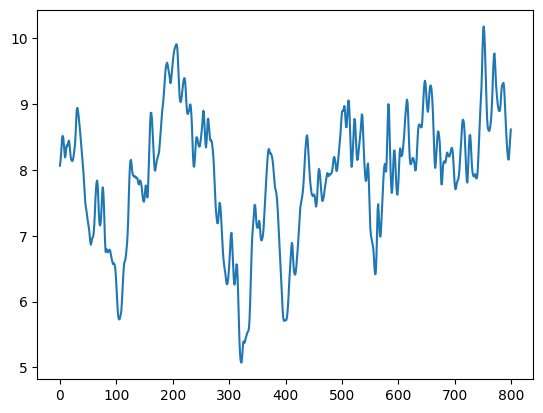

In [17]:
# インデックス番号0 と 1のイオン間距離を時間tに対してモニター

dist=traj[0].get_distance(0,1, mic=True)
print ("distance at t=0:",dist)
print ("")

#---
dist01=[]
for t in range(len(traj)):
    print (t, traj[t].get_distance(0,1, mic=True))
    dist01.append(traj[t].get_distance(0,1, mic=True))

plt.plot(dist01)


D_index = [i for i, x in enumerate(trj[0].get_chemical_symbols()) if x == targetatom]


## Atoms object (ase.build) 

atomsを加工してモデルを作成<BR>

In [18]:
# 超構造作成
from ase.build import make_supercell
from ase.build import sort as asesort

P=[[3,0,0],[0,3,0],[0,0,3]]
atoms_sc=make_supercell(atoms,P)  # order キーワードで 元素の順番を変えられるはずだが動作しない。
cs=atoms_sc.get_chemical_symbols()        #構成原子の元素　(1 x n 行列)
print(cs)
print("---------------------------------------------------------------------------------------------------")
atoms_sorted=asesort(atoms_sc)  # 代わりにsortで並び替え

ase.io.write("supercell.cif",atoms_sorted,format="cif")

cs=atoms_sorted.get_chemical_symbols()        #構成原子の元素　(1 x n 行列)
print(cs)

atoms=atoms_sorted.copy()

['Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl', 'Cl', 'Na', 'Na', 'Na', 'Na', 'Cl', 'Cl', 'Cl

In [21]:
from ase.visualize import view as aseview
aseview(atoms,viewer='ase')

#view(atoms, viewer="ngl")

<Popen: returncode: None args: ['/usr/local/bin/python3', '-m', 'ase', 'gui'...>

## Atoms object (ase.geometry.analysis) 

結晶構造データの解析（advanced）<BR>
参考サイト　https://wiki.fysik.dtu.dk/ase/ase/geometry.html

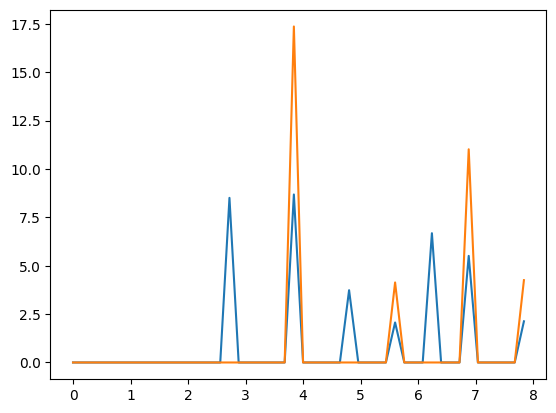

In [22]:
# RDF計算
r=[]
s_rdf=[]

from ase.geometry.analysis import Analysis
analysis=Analysis(atoms_sorted)  #インスタンス化

for i in range(50):
    r.append(i/50*8)

rdf=analysis.get_rdf(8,50,elements=('Na','Cl'))
s_rdf.append(rdf[0])
rdf=analysis.get_rdf(8,50,elements=('Na','Na'))
s_rdf.append(rdf[0])

plt.plot(r,s_rdf[0])
plt.plot(r,s_rdf[1])

#RDFのファイル出力 Na-Clの場合
f=open('rdf_Na-Cl.dat','w')
for i in range(50):
    print (r[i], s_rdf[1][i],file=f)
f.close()



## Atomsデータの書き換え

In [23]:
atomscopy=atoms.copy()
#atoms_new=atoms_sorted.copy()
#注意  atomscopy = atoms だと、今後atomscopyを修正すると、atomsも修正されてしまう。

### 任意原子の座標修正

In [25]:
#分率座標変換 
scaled_positions = atomscopy.get_scaled_positions()
print(scaled_positions)

scaled_positions[0]=[0.2,0.4,0.1]  # 1番目の元素の位置を強制的に変更
print(scaled_positions)

#カーテシアン座標に再変換

cart_positions=[]
for i in range(len(atomscopy)):
    cart_positions.append(list(np.dot(atomscopy.cell,scaled_positions[i])))

print(cart_positions)

atomscopy.positions=cart_positions

[[0.2        0.4        0.1       ]
 [0.16666667 0.         0.        ]
 [0.         0.16666667 0.        ]
 [0.         0.         0.16666667]
 [0.16666667 0.16666667 0.5       ]
 [0.16666667 0.         0.33333333]
 [0.         0.16666667 0.33333333]
 [0.         0.         0.5       ]
 [0.16666667 0.16666667 0.83333333]
 [0.16666667 0.         0.66666667]
 [0.         0.16666667 0.66666667]
 [0.         0.         0.83333333]
 [0.16666667 0.5        0.16666667]
 [0.16666667 0.33333333 0.        ]
 [0.         0.5        0.        ]
 [0.         0.33333333 0.16666667]
 [0.16666667 0.5        0.5       ]
 [0.16666667 0.33333333 0.33333333]
 [0.         0.5        0.33333333]
 [0.         0.33333333 0.5       ]
 [0.16666667 0.5        0.83333333]
 [0.16666667 0.33333333 0.66666667]
 [0.         0.5        0.66666667]
 [0.         0.33333333 0.83333333]
 [0.16666667 0.83333333 0.16666667]
 [0.16666667 0.66666667 0.        ]
 [0.         0.83333333 0.        ]
 [0.         0.66666667 0.16

### 任意原子の元素置換 Na-->K


In [26]:
print(atomscopy.symbols)
atomscopy.symbols[198]='K'
print(atomscopy.symbols)

Cl108Na108
Cl108Na90KNa17


In [27]:
# ファイルの生成
write("kNa107Cl108.cif",atomscopy,format="cif")

### 任意原子の消去（空孔生成）

In [28]:
del atomscopy[0]  #0番目の原子情報を消去（空孔）　この場合はCl原子

# ファイルの生成
write("kNa107Cl107.cif",atomscopy,format="cif")

In [29]:
print(atomscopy.symbols)

Cl107Na90KNa17


### 乱数を使って元素置換

In [30]:
import random

atomscopy=atoms.copy()

listNa=[]
for i in range(len(atomscopy)):
    if atomscopy[i].symbol=='Na':
        listNa.append(i)

# ランダムに4つのNaを選び、該当するindex番号を random_numbersに格納する。
random_numbers = random.sample(listNa, 4)
print(random_numbers)

for ri in random_numbers:
    atomscopy.symbols[ri]='K'

print(atomscopy.symbols)
print(atomscopy.get_chemical_formula('hill'))

write("K_doped.cif",atomscopy,format="cif")


[159, 175, 118, 138]
Cl108Na10KNa19KNa20KNa15KNa40
Cl108K4Na104


2025-04-02 13:24:52.118 Python[99163:15745571] +[IMKClient subclass]: chose IMKClient_Legacy
2025-04-02 13:24:52.118 Python[99163:15745571] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
2025-04-02 13:25:03.025 Python[98717:15731499] +[IMKClient subclass]: chose IMKClient_Legacy
2025-04-02 13:25:03.025 Python[98717:15731499] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
